In [29]:
import chronos as cr

In [30]:
star = cr.Star(toiid=488, search_radius=15)

Target: TOI 488
Searching Vizier: (120.594 3.33716) with radius=3.0 arcsec


In [31]:
gaia_params = star.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for ra,dec=(120.594 3.33716) within 15.0 arcsec.
astrometric_gof_al>21.40 (>20 hints binarity).
See https://arxiv.org/pdf/1804.11082.pdf



In [32]:
#>5 hints binarity
gaia_params.astrometric_excess_noise_sig

4.623293340698873

In [33]:
#comoving wide companion is @d=50 according to the draft
gaia_sources = star.get_nearby_gaia_sources(radius=60)
gaia_sources

Querying Gaia DR2 catalog for ra,dec=(120.594 3.33716) within 60.0 arcsec.


,source_id,parallax,separation,phot_g_mean_mag,delta_Gmag,gamma_pri,gamma_sec,true_depth_pri,true_depth_sec,true_depth_sec>1(cleared?)
0,3094290054327367168,36.515029,0.066446,12.465005,0.000000,2.000000,2.000000,0.002102,0.002102,False
1,3094290054327367040,1.038522,24.981679,20.726505,8.261500,1.000496,2017.508978,0.001052,2.120381,False
2,3094289843870744832,1.619836,30.775702,20.225805,7.760800,1.000786,1272.511112,0.001052,1.337396,False
3,3094289813809199744,0.334380,34.359441,16.786549,4.321544,1.018680,54.532494,0.001071,0.057313,False
4,3094290015669435904,0.418325,43.396499,18.517527,6.052522,1.003793,264.638408,0.001055,0.278132,False
5,3094290015669435008,0.196531,44.494291,18.964418,6.499413,1.002513,398.892177,0.001054,0.419231,False
6,3094289843870746880,0.069610,45.198111,18.730843,6.265838,1.003116,321.874408,0.001054,0.338287,False
7,3094290019967631360,36.357921,49.308667,15.947083,3.482078,1.040473,25.707627,0.001094,0.027018,False
8,3094290118749342336,NaN,50.984232,20.623684,8.158679,1.000545,1835.305212,0.001052,1.928886,False
9,3094290427986310144,NaN,51.498468,19.936040,7.471035,1.001027,974.675047,0.001052,1.024373,False


Yep, Gaia DR2 3094290019967631360 have similar kinematics!

## stellar parameters from literature

In [6]:
star.query_TGv8_catalog()

Gaia DR2 3094290054327367168 not found in TGv8 catalog.


In [7]:
star.query_vizier_param("Rad")

Found 1 references with Rad


{'I/345/gaia2': masked}

In [8]:
star.query_vizier_param("Teff")

Found 5 references with Teff


{'I/345/gaia2': 3822.26,
 'J/AJ/155/180/table1': 3332,
 'J/AJ/155/181/table1': masked,
 'J/AJ/158/93/table2': 4987,
 'J/AJ/159/193/table1': 3176.645}

In [9]:
star.query_vizier_param("logg")

Found 1 references with logg


{'J/AJ/155/181/table1': masked}

In [10]:
star.query_vizier_param("__Fe_H_")

Found 1 references with __Fe_H_


{'J/AJ/155/181/table1': masked}

In [11]:
star.query_vizier_param("vsini")

Found 0 references with vsini


{}

In [12]:
import numpy as np

cols = "Teff logg __Fe_H_ Rad Mass vsini".split()
params={}
for col in cols:
    pars = star.query_vizier_param(col)
    mean = np.nanmean(list(pars.values()))
    err = np.nanstd(list(pars.values()))
    
    params[col] = (mean,err)
    print(f"{col}: {mean:.2f}, {err:.2f}")

Found 5 references with Teff
Teff: 3829.48, 709.50
Found 1 references with logg
logg: nan, nan
Found 1 references with __Fe_H_
__Fe_H_: nan, nan
Found 1 references with Rad
Rad: nan, nan
Found 0 references with Mass
Mass: nan, nan
Found 0 references with vsini
vsini: nan, nan


## MAST data

In [15]:
mast_table = star.query_mast()
mast_table.head()

Searching MAST for (194.468 -39.7581) with radius=3.0 arcsec
Available data: ['TESS/TESS', 'HLSP/TESS', 'GALEX/NUV'] in ['Optical', 'UV']


,intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,...,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,distance
0,science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,NaN,tess-s0010-2-3,...,NaN,10.0,POLYGON 197.64115700 -39.52620700 192.75015200...,NaN,NaN,PUBLIC,False,NaN,17000377462,0.0
1,science,TESS,SPOC,Photometer,TESS,TESS,Optical,178819686,NaN,tess2019085135100-s0010-0000000178819686-0140-s,...,NaN,10.0,CIRCLE ICRS 194.46855100 -39.75766800 0.00138889,NaN,mast:TESS/product/tess2019085135100-s0010-0000...,PUBLIC,False,NaN,17000341614,0.0
2,science,HLSP,ELEANOR,Photometer,TESS,TESS,Optical,postcard-s0010-2-3-cal-0412-0160,NaN,hlsp_eleanor_tess_ffi_postcard-s0010-2-3-cal-0...,...,NaN,10.0,POLYGON ICRS 195.26983000 -39.42084200 195.056...,NaN,mast:HLSP/eleanor/postcards/s0010/2-3/hlsp_ele...,PUBLIC,False,NaN,18003873967,0.0
3,science,HLSP,ELEANOR,Photometer,TESS,TESS,Optical,postcard-s0010-2-3-cal-0412-0214,NaN,hlsp_eleanor_tess_ffi_postcard-s0010-2-3-cal-0...,...,NaN,10.0,POLYGON ICRS 195.15870200 -39.69635900 194.942...,NaN,mast:HLSP/eleanor/postcards/s0010/2-3/hlsp_ele...,PUBLIC,False,NaN,18003867644,0.0
4,science,GALEX,AIS,GALEX,AIS,NUV,UV,AIS_471_1_63,NaN,6387487662386708480,...,AIS,NaN,CIRCLE ICRS 194.16277954 -39.95020047 0.625,http://galex.stsci.edu/data/GR6/pipe/02-vsn/50...,http://galex.stsci.edu/data/GR6/pipe/02-vsn/50...,PUBLIC,NaN,5885.0,1000042065,0.0


## exofop spectra

In [20]:
star.query_specs_from_tfop()

Saved: /home/jp/github/research/project/chronos/chronos/../data/tfop_sg2_spec_table.csv
There are 3 spectra in https://exofop.ipac.caltech.edu/tess/target.php?id=452866790



,TIC ID,TIC,TOI,Telescope,Instrument,Spectral resolution,Wavelength coverage,SNR/resolution,SNR wavelength,Appropriate to PRV,Obs date,User,Group,Tag,Notes
3619,452866790,NaN,NaN,IRTF (3 m),SpeX,2000.0,0.7 to 2.55 microns,NaN,NaN,N,2019-04-23,giacalone,tfopwg,3327,NaN
3620,452866790,NaN,NaN,Subaru (8.2 m),IRD,70000.0,0.97 to 1.75 microns,180.0,1.0,Y,2019-04-17,narita,tfopwg,3332,NaN
3621,452866790,NaN,NaN,FLWO (1.5 m),TRES,44000.0,3850 to 9096 Angstroms,7.7,5110 Angstroms,N,2019-03-30 06:03:27,bieryla,NaN,2977,NaN


## ESO spectra

In [17]:
eso_table = star.query_eso()
eso_table

Searching ESO: (194.468 -39.7581) with diameter=3.0 arcsec
Available data:
Instrument Nspectra  
HARPS      9         

Found 9 ['HARPS'] spectra with SNR>1



,COLLECTION,TARGETNAME,s_ra,s_dec,APERTURE,em_min,em_max,SPECRP,SNR,t_min,t_max,CREATORDID,access_url,dp_id
0,HARPS,TOI-763,194.468343,-39.75790,0.999972,3.781500e-07,6.912260e-07,115000.0,63.4,58669.005258,58669.026091,ivo://eso.org/origfile?HARPS.2019-07-05T00:07:...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2019-07-06T01:12:37.374
1,HARPS,TOI-763,194.468008,-39.75742,0.999972,3.781490e-07,6.912240e-07,115000.0,60.3,58676.997059,58677.017892,ivo://eso.org/origfile?HARPS.2019-07-12T23:55:...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2019-07-14T01:20:03.468
2,HARPS,TOI-763,194.468454,-39.75737,0.999972,3.781470e-07,6.912230e-07,115000.0,56.3,58682.958121,58682.978955,ivo://eso.org/origfile?HARPS.2019-07-18T22:59:...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2019-07-20T01:13:05.949
3,HARPS,TOI-763,194.467862,-39.75831,0.999972,3.781480e-07,6.912250e-07,115000.0,60.2,58670.023086,58670.043919,ivo://eso.org/origfile?HARPS.2019-07-06T00:33:...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2019-07-07T01:09:21.123
4,HARPS,TOI-763,194.467684,-39.75752,0.999972,3.781490e-07,6.912240e-07,115000.0,53.4,58675.983465,58676.004299,ivo://eso.org/origfile?HARPS.2019-07-11T23:36:...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2019-07-13T01:04:56.996
5,HARPS,TOI-763,194.467486,-39.75779,0.999972,3.781480e-07,6.912230e-07,115000.0,71.3,58679.020592,58679.041425,ivo://eso.org/origfile?HARPS.2019-07-15T00:29:...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2019-07-16T01:16:01.475
6,HARPS,TOI-763,194.467817,-39.75768,0.999972,3.781490e-07,6.912230e-07,115000.0,55.2,58682.979312,58683.000145,ivo://eso.org/origfile?HARPS.2019-07-18T23:30:...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2019-07-20T01:13:05.951
7,HARPS,TOI-763,194.467461,-39.75792,0.999972,3.781500e-07,6.912230e-07,115000.0,66.2,58694.974999,58694.995833,ivo://eso.org/origfile?HARPS.2019-07-30T23:23:...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2019-08-01T01:16:54.872
8,HARPS,TOI-763,194.467240,-39.75819,0.999972,3.781490e-07,6.912250e-07,115000.0,74.5,58704.965807,58704.986641,ivo://eso.org/origfile?HARPS.2019-08-09T23:10:...,http://archive.eso.org/datalink/links?ID=ivo:/...,ADP.2019-08-11T01:16:11.259


## isochrones modeling

In [13]:
#include spectroscopic priors from draft and 5-sigma uncertainties
iso_params1 = star.get_iso_params(teff=(3347, 54*5),
                                logg=(4.81, 0.06*5),
                                feh=(0.11, 0.19*5),
                                bands="TESS G BP RP J H K W1 W2 W3 W4".split()
                               )

Querying TIC catalog for ra,dec=(120.594 3.33716) within 15.0 arcsec.
Gaia radius=nan; TIC radius=0.354529
Gaia and TIC catalog cross-match succeeded.
No tycho data in vizier
No 2mass data in vizier


In [14]:
iso_model = star.init_isochrones(iso_params1)

{'Teff': [3347.0, 270.0], 'feh': [0.11, 0.95], 'logg': [4.81, 0.3], 'parallax': [36.51502853381798, 0.11172717181265966], 'TESS': [11.1972, 0.01], 'G': [12.4650049, 0.01], 'BP': [13.9688139, 0.01], 'RP': [11.2707367, 0.01], 'J': [9.627, 0.023], 'H': [9.063, 0.022], 'K': [8.829, 0.024], 'W1': [8.67, 0.02], 'W2': [8.51, 0.02], 'W3': [8.39, 0.02], 'W4': [8.35, 0.29]}


In [15]:
star.isochrones_model.observed_quantities

['TESS_mag',
 'G_mag',
 'BP_mag',
 'RP_mag',
 'J_mag',
 'H_mag',
 'K_mag',
 'W1_mag',
 'W2_mag',
 'W3_mag',
 'Teff',
 'feh',
 'logg',
 'parallax']

In [16]:
star.isochrones_model._priors

{'mass': <isochrones.priors.ChabrierPrior at 0x7f7190d38250>,
 'feh': <isochrones.priors.FehPrior at 0x7f7153defa90>,
 'age': <isochrones.priors.AgePrior at 0x7f7153def990>,
 'distance': <isochrones.priors.DistancePrior at 0x7f7153def910>,
 'AV': <isochrones.priors.AVPrior at 0x7f7153defdd0>,
 'eep': <isochrones.priors.EEP_prior at 0x7f7153defad0>}

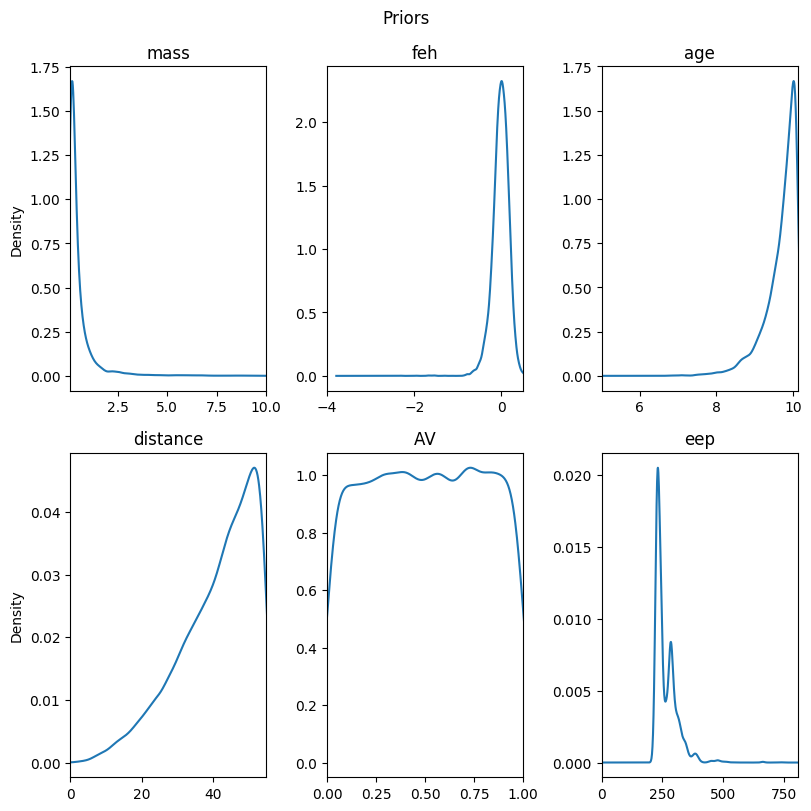

In [17]:
fig = star.plot_isochrones_priors()

In [18]:
star.estimate_Av()

0.08340361047908663

In [19]:
star.target_coord.distance

<Distance 27.38598435 pc>

In [20]:
iso_model = star.run_isochrones(overwrite=True)

Using previously initialized model.
method: Nested Sampling
Done.


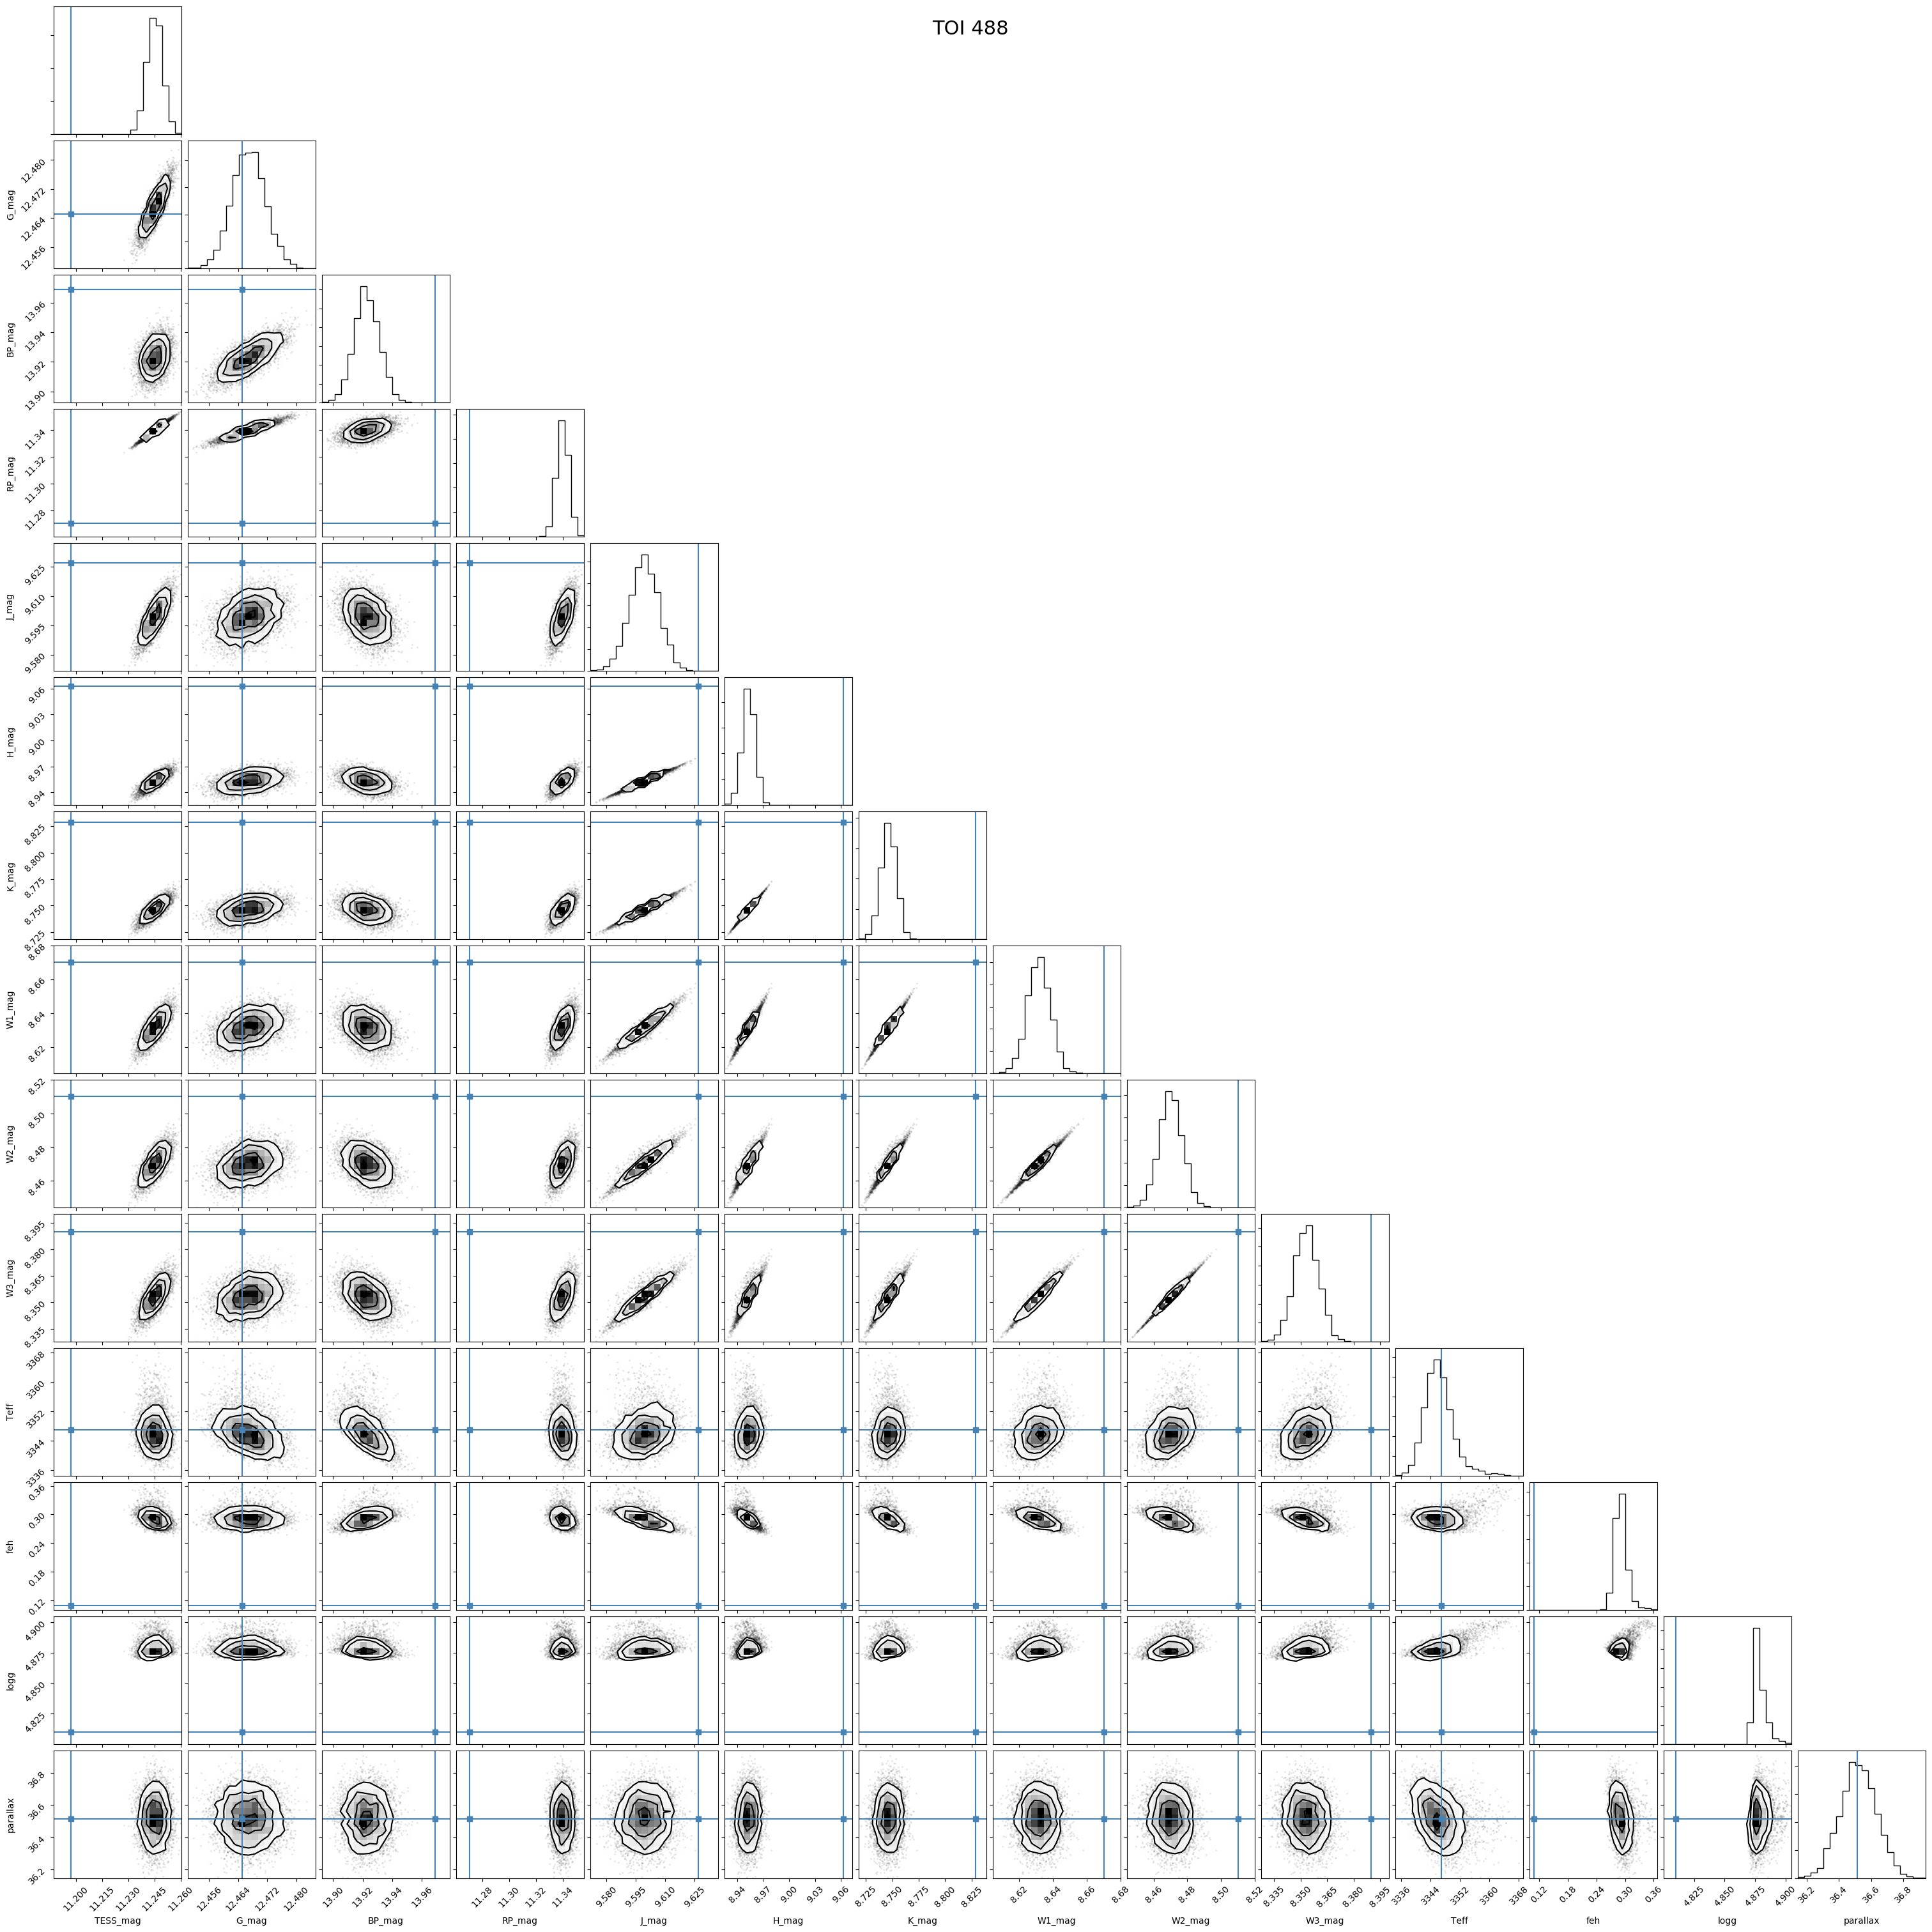

In [21]:
fig=star.plot_corner(posterior="observed")

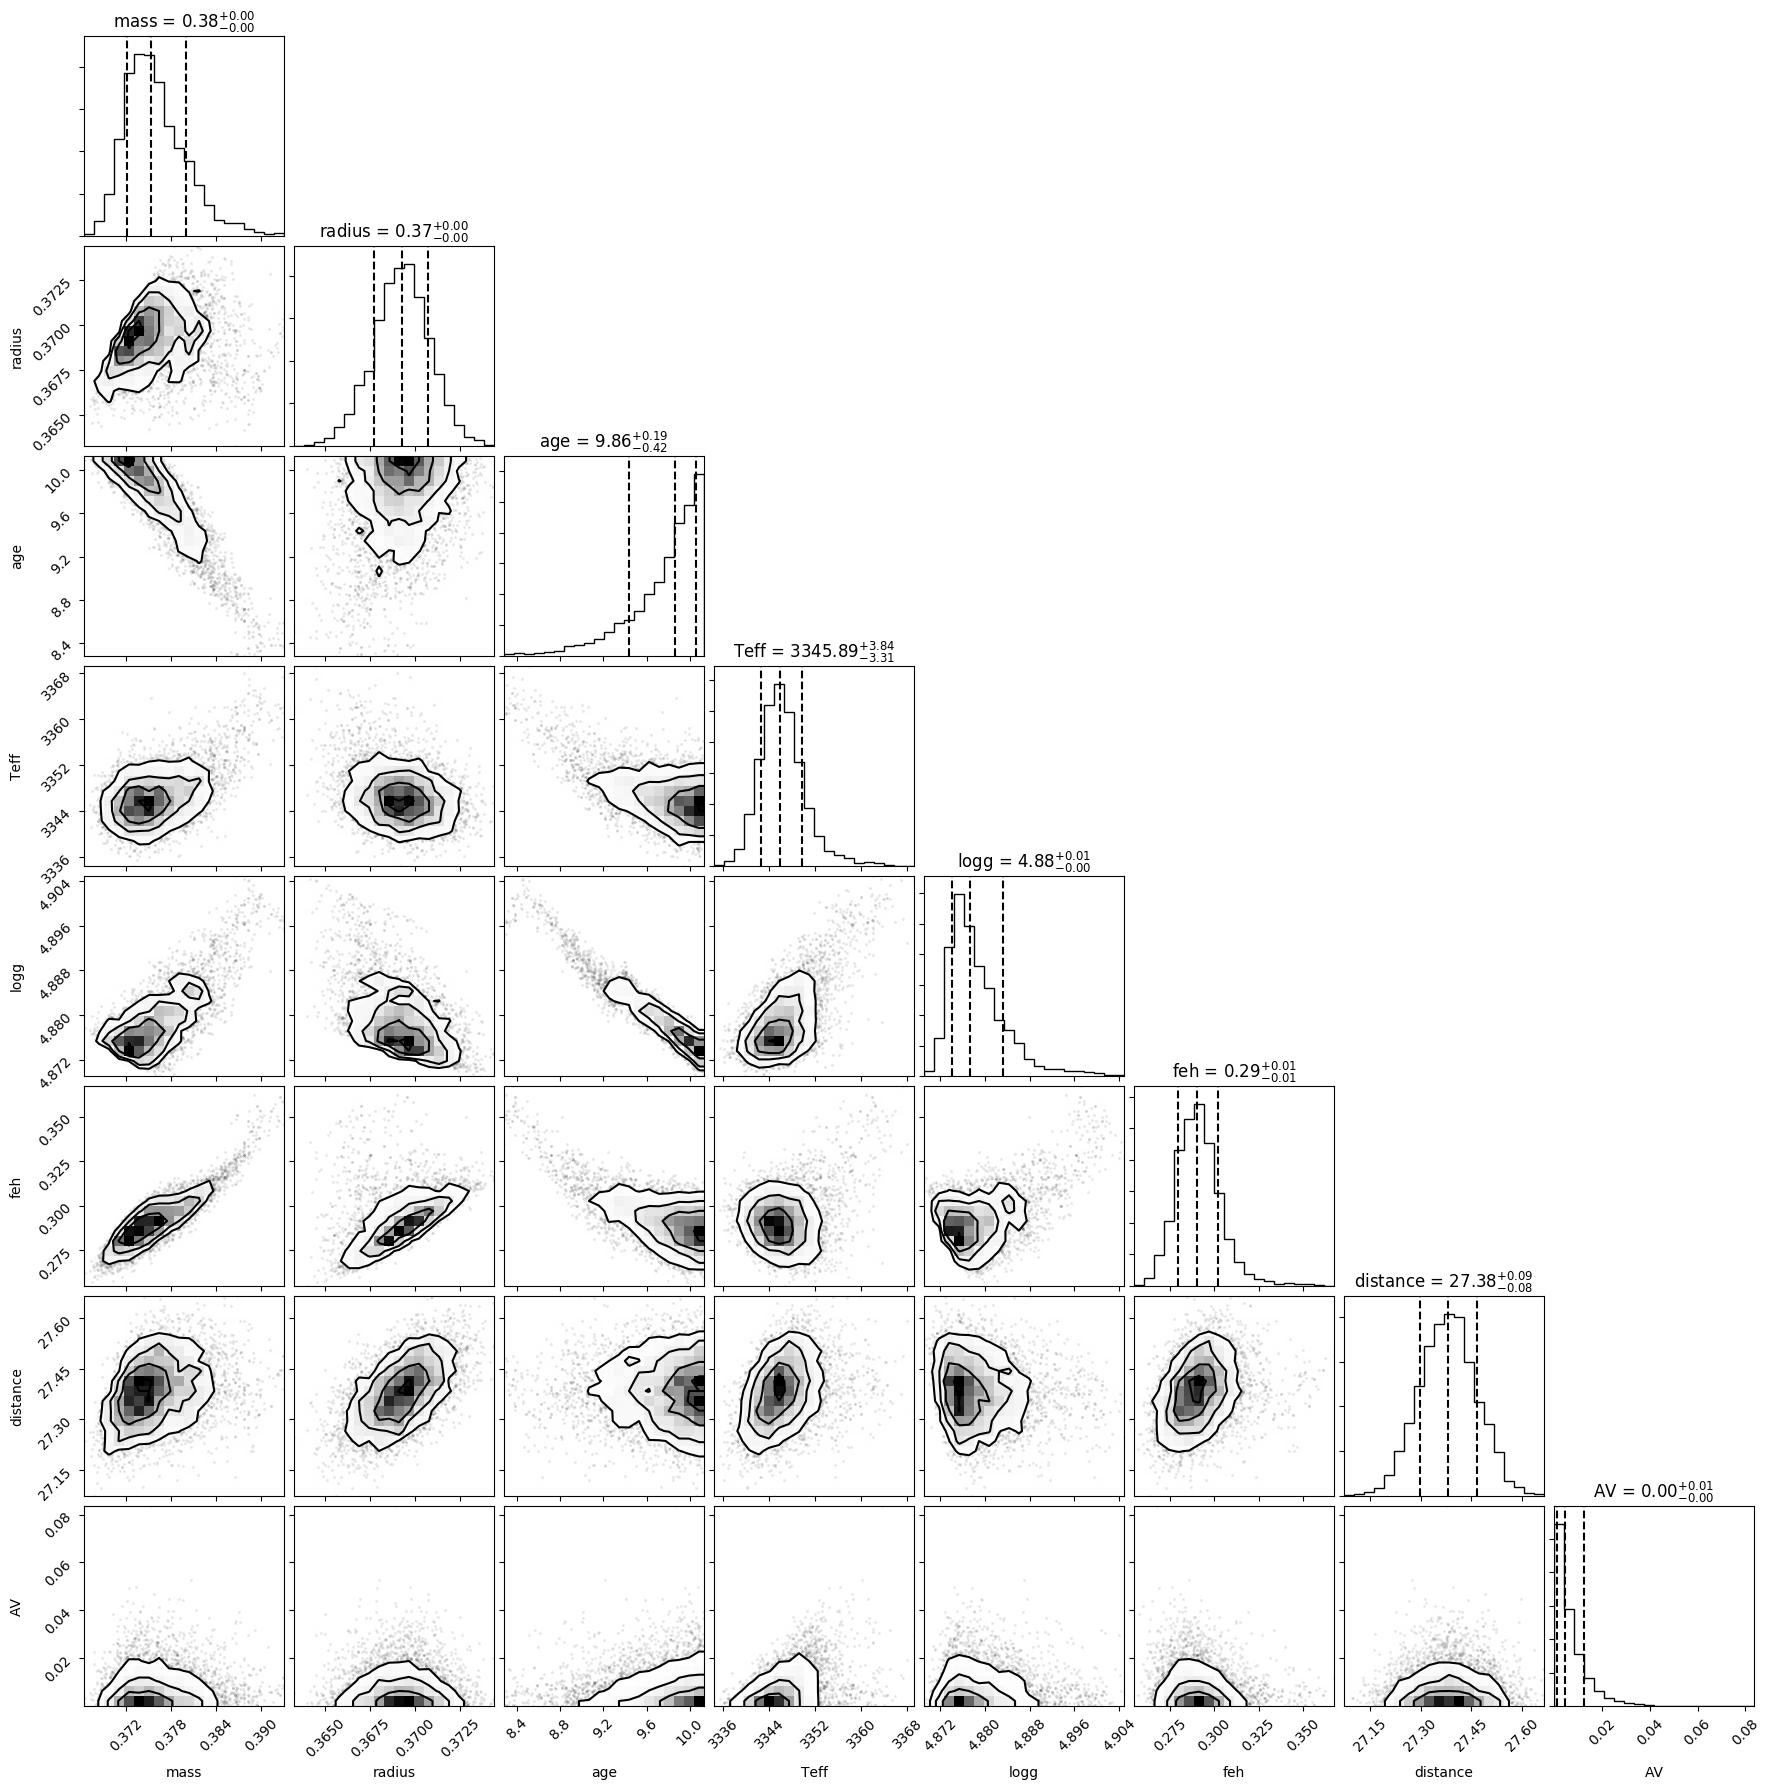

In [22]:
fig = star.plot_corner(posterior='physical')

Bright nearby M-dwarf is consistent with little to no extinction.

In [23]:
star.isochrones_model.derived_samples.describe()

,eep,age,feh,mass,initial_mass,radius,density,logTeff,Teff,logg,...,BP_mag,RP_mag,W1_mag,W2_mag,W3_mag,TESS_mag,Kepler_mag,parallax,distance,AV
count,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,...,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000,5897.000000
mean,286.757036,9.758432,0.291320,0.375944,0.375949,0.369241,10.534556,3.524519,3346.329954,4.878633,...,13.922744,11.339897,8.631456,8.470118,8.353248,11.244972,12.493253,36.520943,27.381807,0.006840
std,18.926698,0.337965,0.013111,0.004092,0.004090,0.001562,0.159852,0.000525,4.081949,0.005261,...,0.008498,0.004385,0.006790,0.006935,0.006968,0.004538,0.004984,0.112204,0.084127,0.006940
min,201.236564,8.280187,0.254789,0.366356,0.366363,0.363286,10.174622,3.522982,3334.382210,4.869092,...,13.892517,11.323401,8.604302,8.444189,8.327708,11.227442,12.474864,36.145965,27.073409,0.000002
25%,278.485665,9.605894,0.282567,0.372978,0.372984,0.368233,10.428902,3.524175,3343.634375,4.874994,...,13.917055,11.336942,8.626866,8.465487,8.348554,11.241913,12.489872,36.446114,27.324496,0.001935
50%,292.517302,9.861816,0.290218,0.375253,0.375261,0.369273,10.507250,3.524463,3345.887709,4.877338,...,13.922509,11.339978,8.631514,8.470140,8.353263,11.245040,12.493125,36.520966,27.381532,0.004710
75%,300.608446,10.010450,0.298308,0.378251,0.378256,0.370280,10.606359,3.524790,3348.406859,4.880996,...,13.928422,11.342783,8.636056,8.474755,8.357908,11.248049,12.496613,36.597198,27.437767,0.009350
max,308.419220,10.129822,0.367386,0.393101,0.393101,0.374379,11.390536,3.527485,3369.198258,4.904893,...,13.956608,11.355812,8.657482,8.496923,8.380257,11.260323,12.513359,36.936612,27.665605,0.083591


In [25]:
star.isochrones_model.derived_samples.to_csv(f"{star.target_name}_posterior.csv")

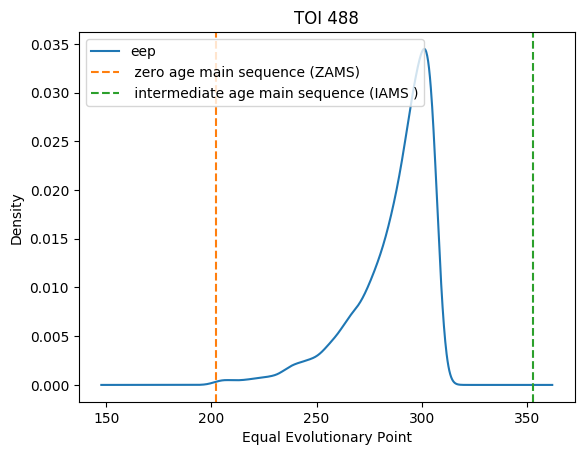

In [26]:
star.plot_posterior_eep()

In [27]:
iso_model.evidence

  analysing data from ./chains/TOI 488-mist-single-.txt


(-157.86869234689013, 0.0418037794847299)

## lightcurves

In [35]:
sc = cr.ShortCadence(toiid=star.toiid)
lc = sc.get_lc()

Target: TOI 488
Available sectors: [7]
Using sector=7.
Using TESS short cadence.

Searching lightcurvefile for TIC 452866790 (sector 7)
Found 1 lightcurves


Using period=1.1981 d, epoch=1492.20 BTJD, duration=1.06 hr
Using biweight filter with window_length=0.13 day


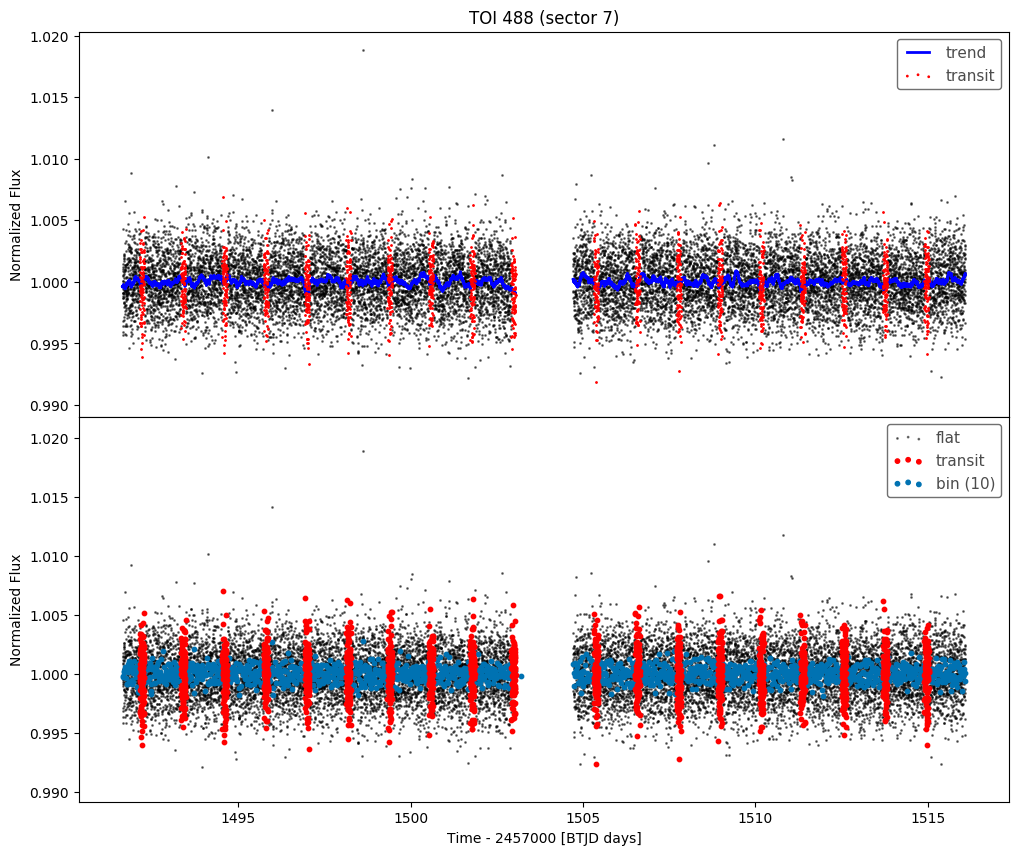

In [12]:
fig = sc.plot_trend_flat_lcs(lc)

In [13]:
flat = sc.get_flat_lc(lc)

Using biweight filter with window_length=0.13 day


  0%|          | 0/2186 periods | 00:00<?

Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 27 durations
Searching 16358 data points, 2186 periods from 0.601 to 12.226 days
Using all 8 CPU threads


100%|██████████| 2186/2186 periods | 00:12<00:00


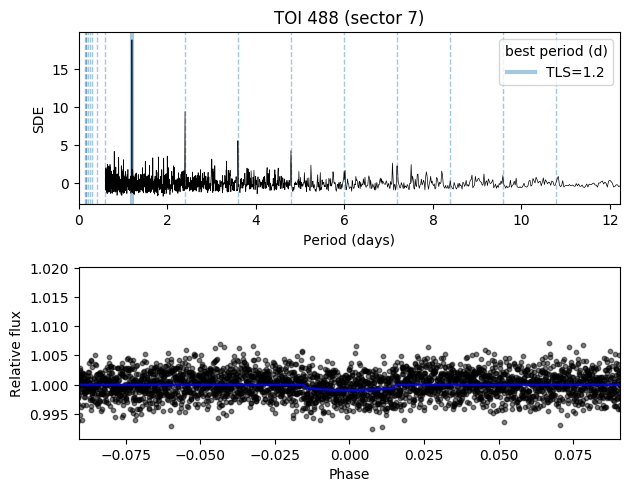

In [14]:
fig = sc.run_tls(flat)

In [15]:
sc.tls_results.SDE, (1-sc.tls_results.depth)*1e3 #ppt

(18.84971354525233, 0.8925418007461605)

In [16]:
sc.toi_depth

0.00105098938

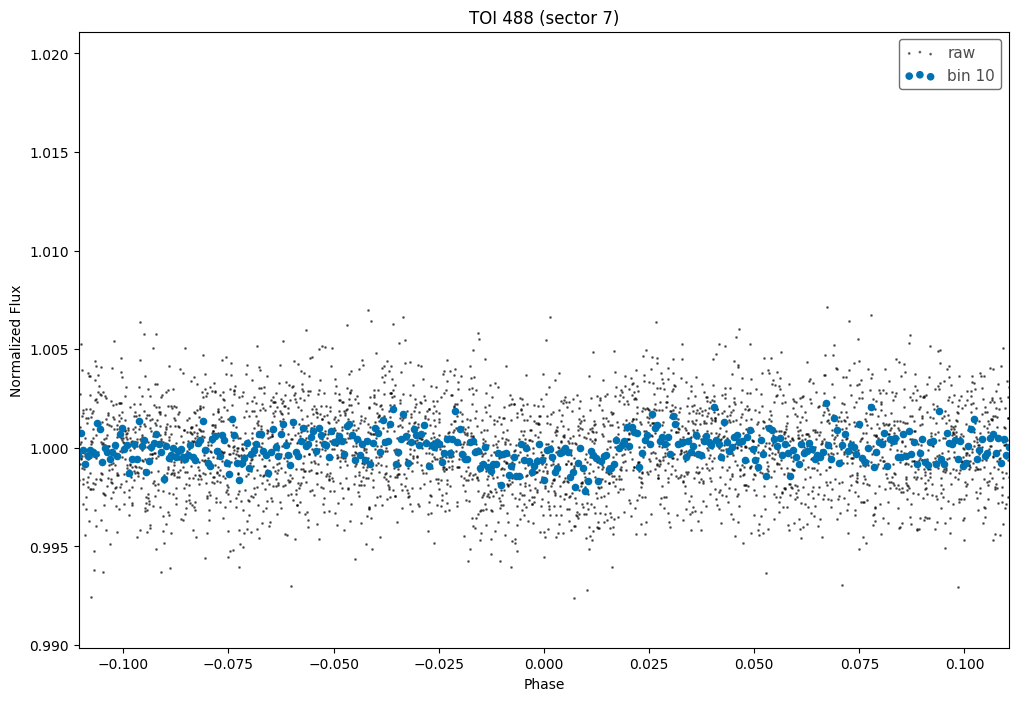

In [17]:
ax = sc.plot_fold_lc(flat)

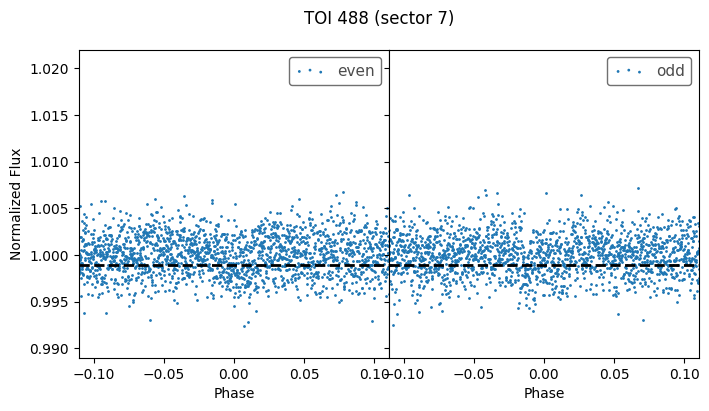

In [18]:
fig = sc.plot_odd_even(flat, duration=sc.toi_duration)

## fov

In [36]:
tpf = sc.get_tpf()


Searching mast for TIC 452866790

1 tpf(s) found in sector(s) [7]
Using data from sector 7 only




In [39]:
gaia_params = sc.query_gaia_dr2_catalog(return_nearest_xmatch=True)
gaia_sources = sc.query_gaia_dr2_catalog(radius=180)

Querying Gaia DR2 catalog for ra,dec=(120.594 3.33716) within 3.0 arcsec.
astrometric_gof_al>21.40 (>20 hints binarity).
See https://arxiv.org/pdf/1804.11082.pdf

Querying Gaia DR2 catalog for ra,dec=(120.594 3.33716) within 180.0 arcsec.


Querying DSS2 Red (180.00 arcsec x 180.00 arcsec) archival image


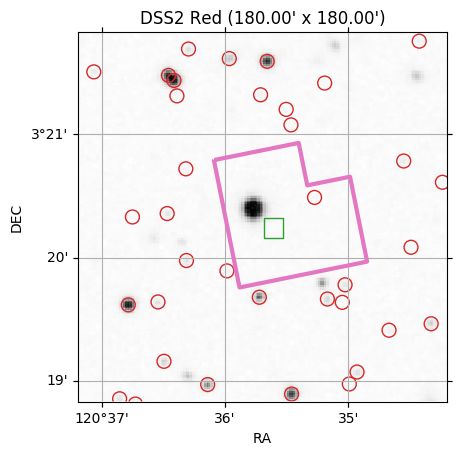

In [40]:
import astropy.units as u

#not corrected for proper motion
fig = cr.plot_gaia_sources_on_survey(tpf,
                                     target_gaiaid=sc.gaiaid,
                                     depth=sc.toi_depth*1e-6,
                                     gaia_sources=gaia_sources,
                                     survey='DSS2 Red',
                                     fov_rad=180*u.arcsec
                                    )

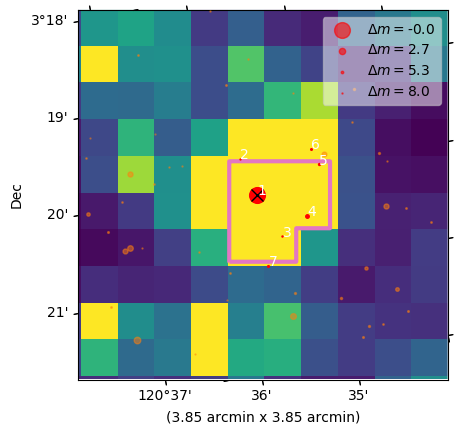

In [53]:
fig = cr.plot_gaia_sources_on_tpf(tpf,
                                 target_gaiaid=sc.gaiaid,
                                 depth=sc.toi_depth*1e-6,
                                 gaia_sources=gaia_sources,
                                 )

In [68]:
sc.contratio

## HARPS bank RVs

In [18]:
harps_bank_table = star.query_harps_bank_table()
harps_bank_table

Loaded: /home/jp/github/research/project/chronos/chronos/../data/HARPS_RVBank_table.csv

Nearest HARPS object is
HD113679: ra,dec=(13:05:52.8243,-38:30:59.990) @ d=119.28 arcmin



## cluster membership

In [19]:
star.get_cluster_membership() #not possible cluster member

Found 0 references with Assoc
ra: 8 matched
dec: 26 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 436 matched
matched 2 params in ASCC_73:
['ra' 'RV']
Target not likely a cluster member
